# Problema 4 Análisis de Sensibilidad en Programación Lineal

Realice un análisis de sensibilidad sobre la solución óptima obtenida mediante el método Simplex para el siguiente problema:

$$
\begin{aligned}
\text{Maximizar} \quad & Z = 4x_1 + 3x_2 \\
\text{sujeto a} \quad & x_1 + 2x_2 \leq 8 \\
& 3x_1 + 2x_2 \leq 12 \\
& x_1, x_2 \geq 0
\end{aligned}
$$

## 1. Resuelva el problema utilizando la implementación del método Simplex

$$
x_1 + 2x_2 + s_1 = 8 \\
3x_1 + 2x_2 + s_2 = 12 \\
x_1, x_2, s_1, s_2 \geq 0 \\
$$

Primero convertimos la funcion a forma estandar introduciendo las variables de holgura

Seguido de esto importamos las funciones necesarias para obtener la solución optima

In [3]:
from simplex import simplex, visualize_table

Inicializamos la solución básica factible 

In [4]:
import numpy as np
import pandas as pd

# Definir los coeficientes de la función objetivo con variables de holgura
c = np.array([4, 3, 0, 0], dtype=float)

# Definir la matriz incluyendo las variables de holgura:
A = np.array([
    [1, 2, 1, 0],   # x1 + 2x2 + s1 = 8
    [3, 2, 0, 1],   # 3x1 + 2x2 + s2 = 12
], dtype=float)

# Terminos independientes
b = np.array([8, 12], dtype=float)

m, n = A.shape  # m = 2 restricciones y n = 4 variables
basic_vars_init = list(range(n - m, n))

# Construir el table para el método Simplex:
table_inicial = np.zeros((m + 1, n + 1))
table_inicial[:m, :n] = A
table_inicial[:m, n] = b
table_inicial[m, :n] = -c

# Visualizar la tabla inicial
print("Table inicial con la solución básica factible:")
visualize_table(table_inicial, m, n, basic_vars_init)


Table inicial con la solución básica factible:
     x1   x2   x3   x4   RHS
s1  1.0  2.0  1.0  0.0   8.0
s2  3.0  2.0  0.0  1.0  12.0
z  -4.0 -3.0 -0.0 -0.0   0.0


In [5]:
# Ejecutar el método Simplex
final_table, basic_vars_final = simplex(table_inicial, m, n)

print("\nTabla Final:")
visualize_table(final_table, m, n, basic_vars_final)


Iteración: 1
     x1   x2   x3   x4   RHS
s1  1.0  2.0  1.0  0.0   8.0
s2  3.0  2.0  0.0  1.0  12.0
z  -4.0 -3.0 -0.0 -0.0   0.0

Iteración: 2
     x1        x2   x3        x4   RHS
s1  0.0  1.333333  1.0 -0.333333   4.0
x1  1.0  0.666667  0.0  0.333333   4.0
z   0.0 -0.333333  0.0  1.333333  16.0

Iteración: 3
     x1   x2    x3    x4   RHS
x2  0.0  1.0  0.75 -0.25   3.0
x1  1.0  0.0 -0.50  0.50   2.0
z   0.0  0.0  0.25  1.25  17.0

Tabla Final:
     x1   x2    x3    x4   RHS
x2  0.0  1.0  0.75 -0.25   3.0
x1  1.0  0.0 -0.50  0.50   2.0
z   0.0  0.0  0.25  1.25  17.0


$$
Z = 4x_1 + 3x_2 \\
x_1 + 2x_2 + s_1 = 8 \quad (1)\\
3x_1 + 2x_2 + s_2 = 12 \quad (2)\\
x_1, x_2, s_1, s_2 \geq 0 \\
\quad\\
\text{Donde la solución optima es:} \\
x_1 = 2.0 \\
x_2 = 3.0 \\
Z = 17.0 \\
$$

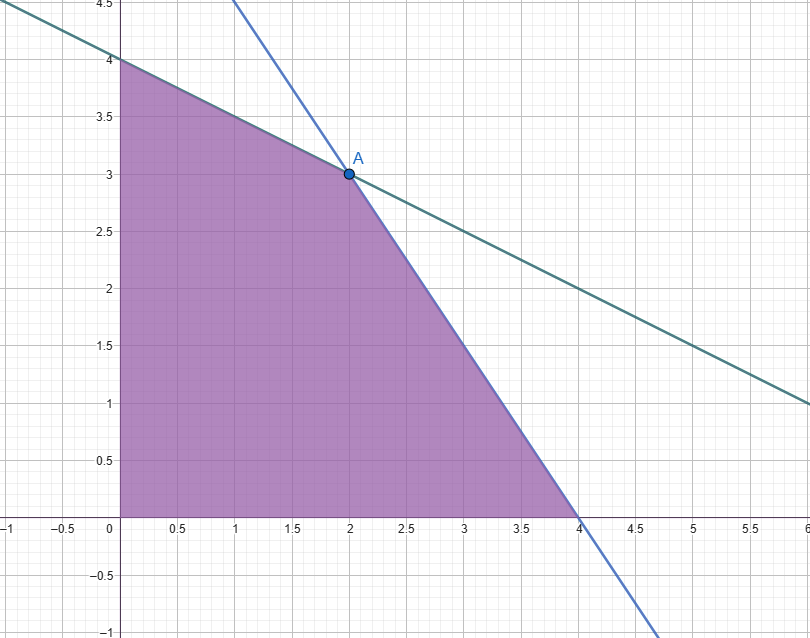

**Variables Básicas:** $x_1, x_2$

**Variables No Básicas:** $s_1, s_2$

**Precios Sombra:** $s_1 = 0.25, s_2 = 1.25$

## 2. Análisis de Sensibilidad Variado

### b) Interpretación de los Precios Sobra

Con base en esta solución, podemos ver que ambas variables de holgura son 0, lo cual nos indica que ambas restricciones están activas (estan limitando a nuestra solución). Lo cual se puede comprobar con una visualización geometrica de la solución optima. Con base en esto, se realiza un análisis de los precios sobra de cada una de las restricciones visualizando  los coeficientes de las variables de holgura en la función objetivo expresada en términos de las variables no básica.

|     |$x_1$  | $x_2$  |  $s_1$   | $s_2$ |  RHS|
|-----|----|-----|-------|----|-----|
|$x_2$|  0.0|  1.0|  0.75| -0.25|   3.0|
|$x_1$ | 1.0 | 0.0| -0.50 | 0.50 |  2.0|
|Z  | 0.0  |0.0 | **0.25**  |**1.25** | 17.0|

Con esto, podemos identificar los precios sombra previamente mencionados, $s_1 = 0.25, s_2 = 1.25$

Con base en esto, podemos decir que por cada unidad que la restricción 1 aumente, el valor optimo de la función objetivo aumentará 0.25. De la misma manera, por cada unidad que la restricción 2 aumente, el valor optimo aumentará 1.25.

## 3. Explicación del Análisis de Sensibilidad